In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Sep 15 01:08 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


In [4]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [6]:
from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=1e-4),
              metrics = ['accuracy'])

# preprocess

In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

In [25]:
!ls -l

total 27056
-rw-r--r-- 1 root root 27683424 Nov  4 01:35 cats_and_dogs_small_1.h5
drwx------ 5 root root     4096 Nov  4 01:01 drive
drwxr-xr-x 1 root root     4096 Nov  1 13:35 sample_data
drwxr-xr-x 4 root root     4096 Nov  4 01:02 test
drwxr-xr-x 4 root root     4096 Nov  4 01:02 train
drwxr-xr-x 4 root root     4096 Nov  4 01:02 validation


In [26]:
train_dir = 'train'
valid_dir = 'validation'
test_dir  = 'test'

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 42s 114ms/step - loss: 0.6901 - accuracy: 0.5280 - val_loss: 0.6875 - val_accuracy: 0.5300
Epoch 2/30
100/100 [==============================] - 11s 115ms/step - loss: 0.6613 - accuracy: 0.6040 - val_loss: 0.6483 - val_accuracy: 0.6400
Epoch 3/30
100/100 [==============================] - 11s 113ms/step - loss: 0.6151 - accuracy: 0.6680 - val_loss: 0.6612 - val_accuracy: 0.5970
Epoch 4/30
100/100 [==============================] - 11s 114ms/step - loss: 0.5696 - accuracy: 0.7110 - val_loss: 0.6655 - val_accuracy: 0.6060
Epoch 5/30
100/100 [==============================] - 11s 113ms/step - loss: 0.5415 - accuracy: 0.7220 - val_loss: 0.5880 - val_accuracy: 0.6760
Epoch 6/30
100/100 [==============================] - 11s 115ms/step - loss: 0.5025 - accuracy: 0.7570 - val_loss: 0.5595 - val_accuracy: 0.7060
Epoch 7/30
100/100 [==============================] - 12s 116ms/step - loss: 0.4775 - accuracy: 0.7720 - val_loss: 0.7523 - val_ac

In [14]:
model.save('cats_and_dogs_small_1.h5')

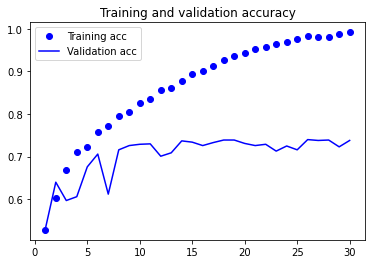

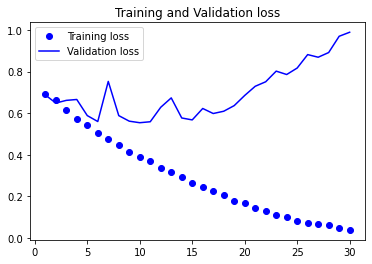

In [17]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

# 데이터 증식(Image Augmentation)


In [19]:
datagen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

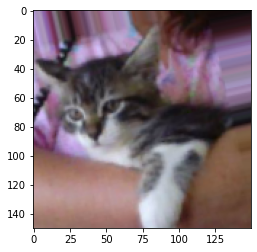

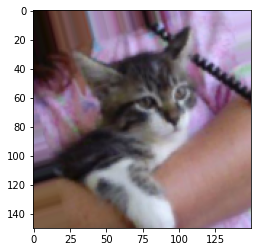

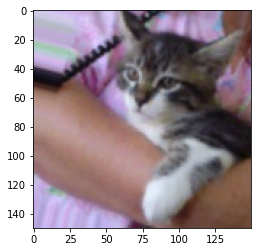

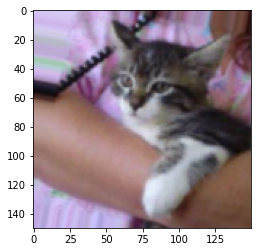

In [21]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

train_cats_dir = train_dir = os.path.join('train', 'cats')
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path=fnames[77]

img=image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [22]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=1e-4),
              metrics = ['accuracy'])

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True,
    fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size=20,
    class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [29]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 22s 211ms/step - loss: 0.6958 - accuracy: 0.4905 - val_loss: 0.6864 - val_accuracy: 0.5420
Epoch 2/100
100/100 [==============================] - 21s 207ms/step - loss: 0.6866 - accuracy: 0.5520 - val_loss: 0.6786 - val_accuracy: 0.5280
Epoch 3/100
100/100 [==============================] - 21s 205ms/step - loss: 0.6769 - accuracy: 0.5730 - val_loss: 0.6611 - val_accuracy: 0.6000
Epoch 4/100
100/100 [==============================] - 20s 204ms/step - loss: 0.6644 - accuracy: 0.5925 - val_loss: 0.6798 - val_accuracy: 0.5740
Epoch 5/100
100/100 [==============================] - 20s 204ms/step - loss: 0.6578 - accuracy: 0.6000 - val_loss: 0.6620 - val_accuracy: 0.5960
Epoch 6/100
100/100 [==============================] - 21s 214ms/step - loss: 0.6457 - accuracy: 0.6085 - val_loss: 0.6301 - val_accuracy: 0.6500
Epoch 7/100
100/100 [==============================] - 22s 216ms/step - loss: 0.6414 - accuracy: 0.6345 - val_loss: 0.6266 -

In [30]:
model.save('cats_and_dogs_small_2.h5')